In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Backpropagation


#### Backpropagation is an algorithm that is used to train the model by tweaking the values of the weight and bias parameters.
###### Training is performed in 2 "passes"

1.) In the first pass, it moves in the "forward" direction, effectively calculating the predicted output of the model.

2.) In the second pass, it moves in the "backward" direction, tweaking the weights and biases based on the error of the output prediciton. This, in its essence is backpropagation.

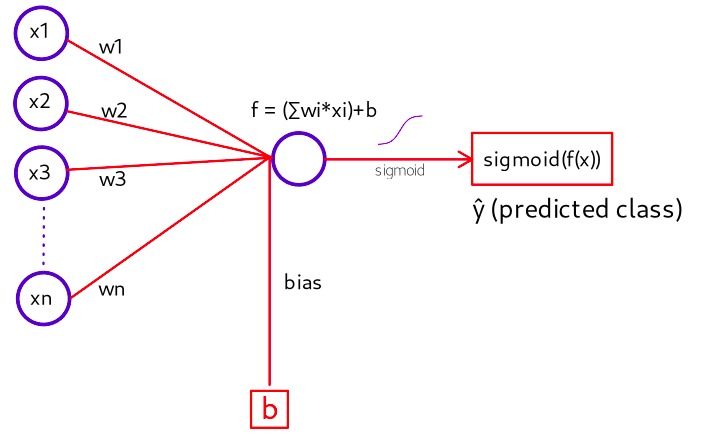

### Loss function

A loss function is a metric that is used to quantify how "good" a model is performing. It compares the predicted output to the expected output and gives us the "error" in the prediction.
Based on the type problem at hand, we may choose to use one of many different loss functions. The first 3 are typically used in regression tasks, and the last 2 are used in case of classification.

    1.) Mean Squared Error(MSE)
    2.) Root Mean Squared Error(RMSE)
    3.) Mean Absolute Error(L1 loss)(MAE)
    4.) Binary Crossentropy Loss: This is used for classification tasks if there are only 2 classes.
    5.) Categorical Crossentropy Loss: This is used for classification tasks if there are more than 2 classes.


### Backpropagation example

This example is taken from the following website, please go through the website if you wish to see steps in more detail. Note that the Input labels in the website is wrong.

https://medium.com/@michaeldelsole/a-single-layer-artificial-neural-network-in-20-lines-of-python-ae34b47e5fef





Lets say we are given the following task for classification:

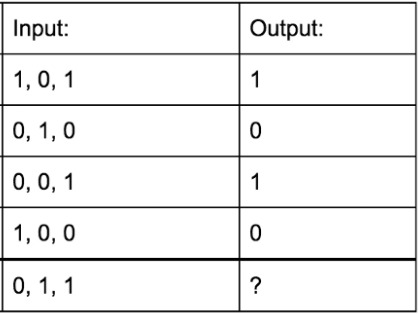

We need a loss function to calculate to be used in the backpropagation. For simplicity, we will take the loss function to be (y-ŷ)


### Gradient descent
This is a very simple example where we will have 3 weight parameters and a bias term, which can be tweaked by hand  with trial and error quite easily. But for other applications, We will have models which will have thousands, if not millions of parametrs. So training those models by hand might get a bit too tedious for us.

To reach the correct set of parameters, we then use gradient decent to reach the minima of the loss function. An analogy for the same is a ball rollin down a hill to settle into the valley of the hills. We can use the loss function to be a n-dimentional function, where n is the number of parameters.

Logically thinking, we need to find the steepest slope downwards to reach the minima as quickly as possible.

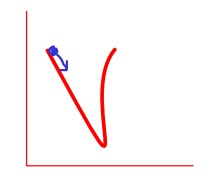

This is basically finding the slope of the loss function, whih is basically the gradient. What we do is that at each time step, we calculate the gradient of the slope function, and move down the slope by a small step. The step size is a hyperparamer of the model, which we will call the learning rate.

###### Once we have found our gradient, we update the weights: w(t) = w(t-1)-gradient.
Once we start reaching the bottom, the gradient becomes shallower, this way we tend to make more minor adjustments to the parameters.

### The Math behind it all
We will now see the mathematical back-end of the algorithm

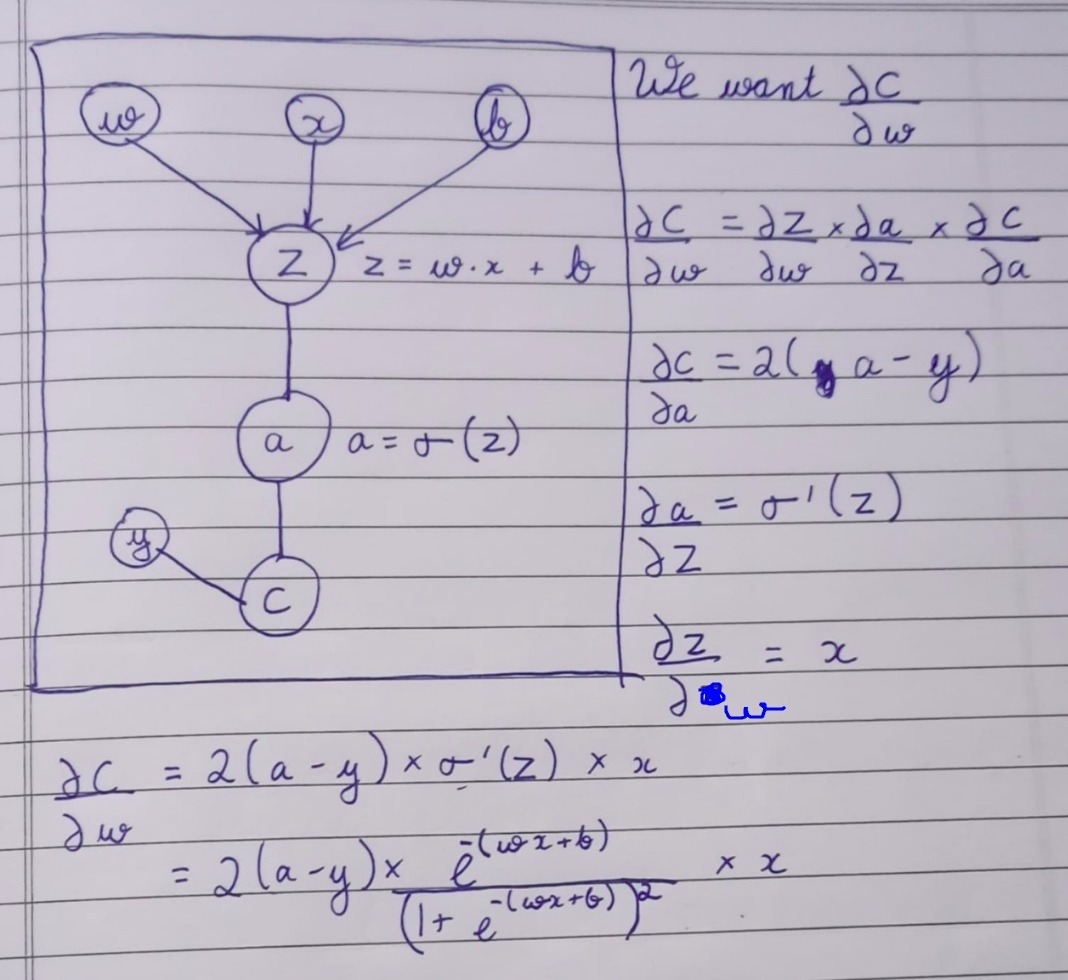

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/math_backprop.jpeg', width=500, height=500)

### Below are the functions that we need to perform backpropagation

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))     # numpy is used as it supports operations on vectors as well (returning a vector), whereas math.exp would only support x being a single value

In [ ]:
def forwardprop(inputs, weights):
    return sigmoid(np.dot(inputs, weights))

In [ ]:
def backprop(x, y, weights):
    epochs=20
    for iter in range(epochs):
        y_hat = forwardprop(x, weights)
        error = (y-y_hat)
        grad = y_hat*(1-y_hat)
        weights += np.dot(x.T, error*grad)
        
    print(weights.T)
    return (y_hat)

In [ ]:
def classify(labels):
    output=[]
    for i in range(len(labels)):
        if(labels[i]<0.5):
            output.append(0)
        else:
            output.append(1)
    return output

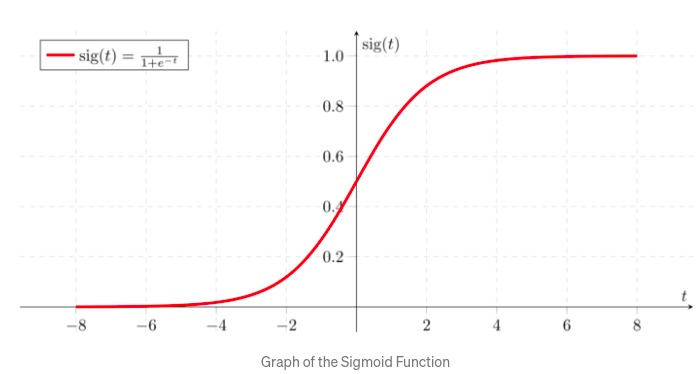

We can see that the slope of the sigmoid curve is highest near 0, so we keep weights wilch are close to 0, to maximize the weight change, which helps us converge onto a solution quicker. So we initialize our weights as random numbers between 0 and 1

In [ ]:
x = np.array([[1,0,1], [0,1,0], [0,0,1], [1,0,0]])    # Input labels in the above example
y = np.array([[1,0,1,0]]).T                           # Transpose of output labels in the example
weights = np.random.random((3,1))                     # Initilize weight vectors randomly

print(x)
print()
print(y)
print()
print(weights)

[[1 0 1]
 [0 1 0]
 [0 0 1]
 [1 0 0]]

[[1]
 [0]
 [1]
 [0]]

[[0.29944093]
 [0.02682982]
 [0.46624155]]


In [ ]:
output_labels = np.array(classify(backprop(x, y, weights)))
print((output_labels==y.T).all())
print(output_labels==y.T)
print(y.T)
print(output_labels)

[[-1.66230819 -2.2787026   3.60470441]]
True
[[ True  True  True  True]]
[[1 0 1 0]]
[1 0 1 0]


In [ ]:
# Testing with an example
testing_label = classify(forwardprop([0, 1, 1], weights))
print(testing_label)

[1]


# Tensorflow and Keras
Physically making a model and accounting for each node individually can get quite challenging, so to help us speed up building a model, many libraries exist out there which help us define and train models with only a few lines of code. This way we can actually focus on training models instead if making them. Tensorflow is currently a library provided by google as its ML library. Keras is another sublibrary under Tensorflow, which contain the actual neural network tools. The rest of the tensorflow library has functions used for pre-processing, it also contains some datasets which we will use today. 

Tensorflow comes with a MNIST digit dataset, which contain 28*28 pixel pictures of handwritten digits.
Today we will see how we can differentiate between the digits 0 and 1 by making a simple neural net

In [ ]:
# Using tensorflow's mnist dataset
mnist = tf.keras.datasets.mnist

# Loading the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()       # X_train, X_test have values between 0 and 255

# Basic preprocessing, so that X_train and X_test have values between 0 and 1
X_train = tf.keras.utils.normalize(X_train, axis = 1)     
X_test = tf.keras.utils.normalize(X_test, axis = 1)

print(X_train.shape)                                          # seeing the shape of the train data
print(X_test.shape)                                           # seeing the shape of the test data

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


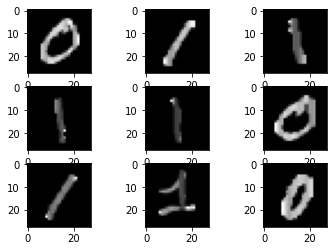

(12665, 784)
(12665,)

(2115, 784)
(2115,)


In [ ]:
# filtering inputs and outputs for only digits 0 and 1
x_train = []
y_train = []

x_test = []
y_test = []

# Keeping only 0 and 1 
for i in range(len(X_train)):
    if Y_train[i] <= 1:
        x_train.append(X_train[i])
        y_train.append(Y_train[i])
    
for i in range(len(X_test)):
    if Y_test[i] <= 1:
        x_test.append(X_test[i])
        y_test.append(Y_test[i])
        
# seeing the images
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

# Reshaping for 1D input vector, as the perceptron takes a 1-D input
x_train = np.array(x_train).reshape(-1, 28*28)
x_test = np.array(x_test).reshape(-1, 28*28)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(x_train.shape)
print(y_train.shape)
print()
print(x_test.shape)
print(y_test.shape)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((None, 784)),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(optimizer="SGD", loss="binary_crossentropy", metrics="accuracy")

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, None, 1)           785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 5, validation_data=(x_test, y_test))

Epoch 1/5
396/396 [==============================] - 1s 2ms/step - loss: 0.3634 - accuracy: 0.9448 - val_loss: 0.1956 - val_accuracy: 0.9972
Epoch 2/5
396/396 [==============================] - 1s 1ms/step - loss: 0.1520 - accuracy: 0.9940 - val_loss: 0.1128 - val_accuracy: 0.9976
Epoch 3/5
396/396 [==============================] - 1s 1ms/step - loss: 0.1007 - accuracy: 0.9948 - val_loss: 0.0803 - val_accuracy: 0.9981
Epoch 4/5
396/396 [==============================] - 1s 1ms/step - loss: 0.0770 - accuracy: 0.9952 - val_loss: 0.0628 - val_accuracy: 0.9981
Epoch 5/5
396/396 [==============================] - 1s 1ms/step - loss: 0.0631 - accuracy: 0.9955 - val_loss: 0.0519 - val_accuracy: 0.9981


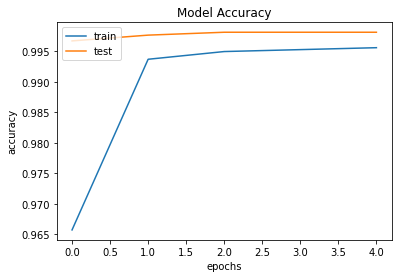

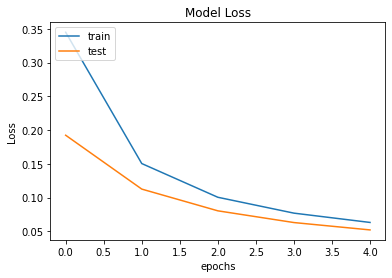

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

## Homework
Make a model that is able to distinguish T-shirts and Trousers (Label being 0 and 1 respectively), on the *fashion_mnist* dataset.

Also, Go through this playlist before next week's lab: https://youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

In [ ]:
#Using tensorflow's mnist fashion dataset
mnist_hw = tf.keras.datasets.fashion_mnist
#loading the data
(X_train_hw, Y_train_hw), (X_test_hw, Y_test_hw) = mnist_hw.load_data() ##Write code here 

#Preprocess the data
##Write code here
X_train_hw = tf.keras.utils.normalize(X_train_hw, axis = 1)
X_test_hw = tf.keras.utils.normalize(X_test_hw, axis = 1)

print(X_train_hw.shape)
print(X_test_hw.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


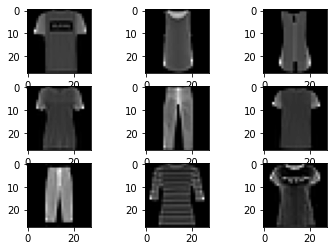

(12000, 784)
(12000,)

(2000, 784)
(2000,)


In [ ]:
# filtering inputs and outputs for only digits 0 and 1
x_train_hw = []
y_train_hw = []
x_test_hw = []
y_test_hw = []

# Keeping only 0 and 1 
for i in range(len(X_train_hw)):
    ##Write code here
    if Y_train_hw[i] <= 1:
        x_train_hw.append(X_train_hw[i])
        y_train_hw.append(Y_train_hw[i])
        
for i in range(len(X_test_hw)):
    ##Write code here
    if Y_test_hw[i] <= 1:
        x_test_hw.append(X_test_hw[i])
        y_test_hw.append(Y_test_hw[i])
        
# seeing the images
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train_hw[i], cmap=plt.get_cmap('gray'))
plt.show()



# Reshaping for 1D input vector
##Write code here to reshape
x_train_hw = np.array(x_train_hw).reshape(-1, 28*28)
x_test_hw = np.array(x_test_hw).reshape(-1, 28*28)
y_train_hw = np.array(y_train_hw)
y_test_hw = np.array(y_test_hw)


print(x_train_hw.shape)
print(y_train_hw.shape)
print()
print(x_test_hw.shape)
print(y_test_hw.shape)

In [ ]:
# Defining the model here
model_hw = tf.keras.Sequential([
    ##Write code here
    tf.keras.layers.Input((None, 784)),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# Compiling the model
model_hw.compile(optimizer="SGD", loss="binary_crossentropy", metrics="accuracy")

In [ ]:
# Training the model (10 epochs)
history_hw = model_hw.fit(x_train_hw, y_train_hw, epochs = 10, validation_data=(x_test_hw, y_test_hw))

Epoch 1/10
375/375 [==============================] - 1s 1ms/step - loss: 0.3756 - accuracy: 0.9513 - val_loss: 0.2505 - val_accuracy: 0.9485
Epoch 2/10
375/375 [==============================] - 0s 858us/step - loss: 0.2013 - accuracy: 0.9587 - val_loss: 0.1809 - val_accuracy: 0.9500
Epoch 3/10
375/375 [==============================] - 0s 962us/step - loss: 0.1561 - accuracy: 0.9622 - val_loss: 0.1526 - val_accuracy: 0.9535
Epoch 4/10
375/375 [==============================] - 0s 940us/step - loss: 0.1345 - accuracy: 0.9642 - val_loss: 0.1369 - val_accuracy: 0.9575
Epoch 5/10
375/375 [==============================] - 0s 920us/step - loss: 0.1213 - accuracy: 0.9663 - val_loss: 0.1264 - val_accuracy: 0.9575
Epoch 6/10
375/375 [==============================] - 0s 866us/step - loss: 0.1122 - accuracy: 0.9673 - val_loss: 0.1189 - val_accuracy: 0.9615
Epoch 7/10
375/375 [==============================] - 0s 916us/step - loss: 0.1053 - accuracy: 0.9690 - val_loss: 0.1130 - val_accuracy: 0

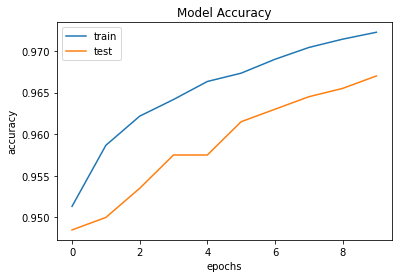

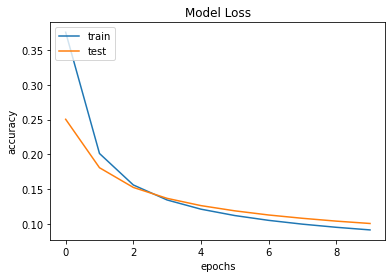

In [ ]:
# Plotting the model performance
plt.plot(history_hw.history['accuracy'])
plt.plot(history_hw.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(history_hw.history['loss'])
plt.plot(history_hw.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()